## Import of libraries

In [1]:
#!pip yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

## Bitcoin Dataset 

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Prices ($)')

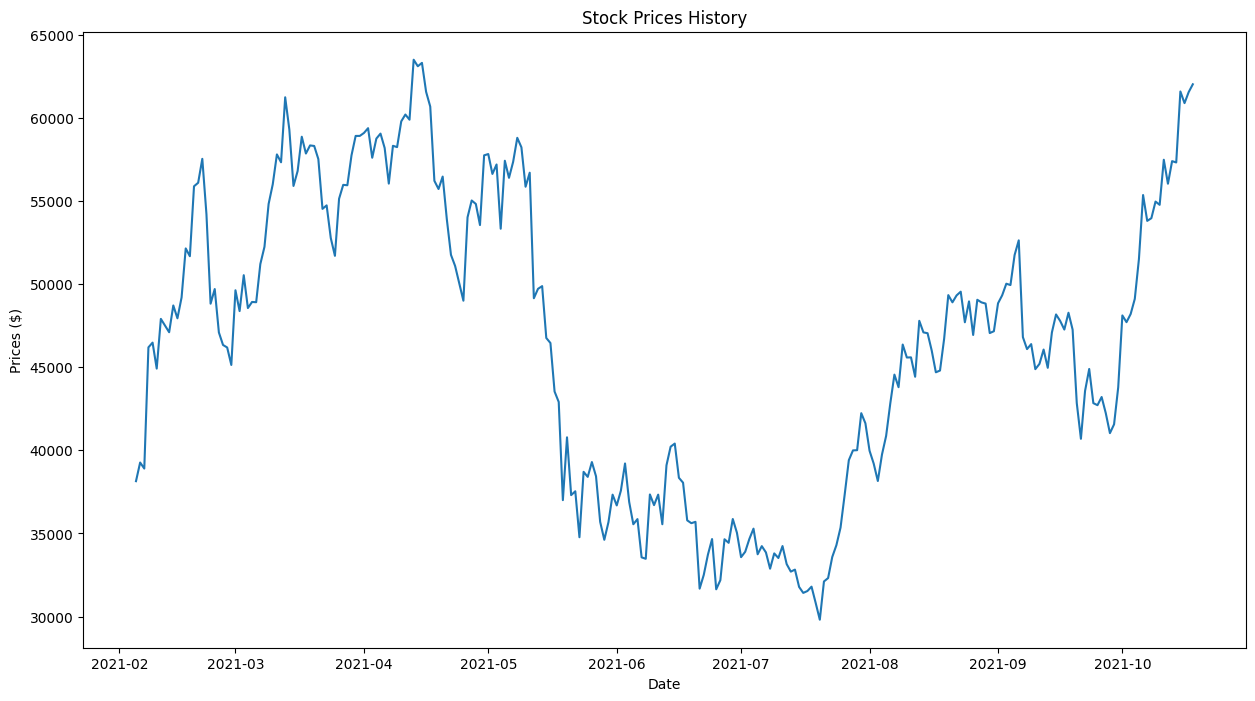

In [2]:
stock_data = yf.download('BTC-USD', start="2021-02-05", end="2021-10-19")

plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [3]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886


In [4]:
stock_data.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886
...,...,...,...,...,...,...,...
251,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,57321.523438,36615791366
252,2021-10-15,57345.902344,62757.128906,56868.144531,61593.949219,61593.949219,51780081801
253,2021-10-16,61609.527344,62274.476562,60206.121094,60892.179688,60892.179688,34250964237
254,2021-10-17,60887.652344,61645.523438,59164.468750,61553.617188,61553.617188,29032367511


## Sentiment score dataset

In [5]:
sentiment_df = pd.read_csv("./daily_score from 2021-02-05 to 2021-05-29.csv")

In [6]:
sentiment_df.head()

,day_date,weighted_positive_score,weighted_neutral_score,weighted_negative_score,total,date
0,2021-02-05,0.322386,0.579557,0.098057,9292882.0,2021-02-05
1,2021-02-06,0.369837,0.551609,0.078554,35499712.0,2021-02-06
2,2021-02-07,0.372872,0.394746,0.232381,45388049.0,2021-02-07
3,2021-02-08,0.499037,0.405186,0.095777,280623237.0,2021-02-08
4,2021-02-09,0.571332,0.279033,0.149636,268020760.0,2021-02-09


# Full

In [7]:
sentiment_df = sentiment_df.rename(columns= {'date':'Date'})
sentiment_df.head()

,day_date,weighted_positive_score,weighted_neutral_score,weighted_negative_score,total,Date
0,2021-02-05,0.322386,0.579557,0.098057,9292882.0,2021-02-05
1,2021-02-06,0.369837,0.551609,0.078554,35499712.0,2021-02-06
2,2021-02-07,0.372872,0.394746,0.232381,45388049.0,2021-02-07
3,2021-02-08,0.499037,0.405186,0.095777,280623237.0,2021-02-08
4,2021-02-09,0.571332,0.279033,0.149636,268020760.0,2021-02-09


In [8]:
sentiment_df.Date = sentiment_df.Date.astype('datetime64[ns]')

In [9]:
stock_data = stock_data.reset_index()

In [10]:
Data = pd.merge(sentiment_df,stock_data,how='inner',on = 'Date')

In [11]:
Data = Data.drop(columns=['day_date'])

In [14]:
mean_value = (Data['Open'] + Data['Close'])/2

In [16]:
Data['market_value'] = mean_value

In [17]:
Data

,weighted_positive_score,weighted_neutral_score,weighted_negative_score,total,Date,Open,High,Low,Close,Adj Close,Volume,market_value
0,0.322386,0.579557,0.098057,9292882.0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402,37537.927734
1,0.369837,0.551609,0.078554,35499712.0,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,38702.199219
2,0.372872,0.394746,0.232381,45388049.0,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,39076.816406
3,0.499037,0.405186,0.095777,280623237.0,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,42541.646484
4,0.571332,0.279033,0.149636,268020760.0,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,46333.048828
5,0.542428,0.335979,0.121593,205278194.0,2021-02-10,46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896,45693.972656
6,0.240695,0.673435,0.085870,218208441.0,2021-02-13,47491.203125,48047.746094,46392.281250,47105.515625,47105.515625,70250456155,47298.359375
7,0.295121,0.525871,0.179008,210471071.0,2021-02-14,47114.507812,49487.640625,47114.507812,48717.289062,48717.289062,71248675228,47915.898438
8,0.332210,0.437570,0.230220,233537711.0,2021-02-15,48696.535156,48875.570312,46347.476562,47945.058594,47945.058594,77069903166,48320.796875
9,0.488216,0.396591,0.115193,280489070.0,2021-02-18,52140.972656,52474.105469,51015.765625,51679.796875,51679.796875,52054723579,51910.384766


In [18]:
Data.to_csv('Data_mean.csv',index=False)

In [13]:
data = pd.read_csv("Data.csv")

In [19]:
data.to_dict()['weighted_positive_score'][0]

0.3223856710975131

In [20]:
test = data.to_dict()
{key:test[key][0] for key in test.keys()}

{'weighted_positive_score': 0.3223856710975131,
 'weighted_neutral_score': 0.5795572353119302,
 'weighted_negative_score': 0.0980570935905567,
 'total': 9292882.0,
 'Date': '2021-02-05',
 'Open': 36931.546875,
 'High': 38225.90625,
 'Low': 36658.76171875,
 'Close': 38144.30859375,
 'Adj Close': 38144.30859375,
 'Volume': 58598066402}

In [27]:
max([k for k in test['Date'].keys()])

35

In [28]:
[k for k in test]

['weighted_positive_score',
 'weighted_neutral_score',
 'weighted_negative_score',
 'total',
 'Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume']